## Feature Importance 시각화

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import classification_util as util
import seaborn as sns

### CICIDS2017 Format

In [2]:
cici_fi = [4.49462386e-03, 7.54428849e-03, 7.49321143e-03, 3.36220542e-02, 
           2.34363000e-03, 1.99712545e-03, 5.59993195e-04, 2.55821435e-03, 
           2.14774426e-03, 3.01803477e-04, 4.08033956e-03, 1.03233867e-02, 
           1.47471425e-03, 9.76713000e-03, 1.40650357e-03, 9.67022429e-03, 
           8.43539483e-03, 4.99441142e-03, 3.56078405e-03, 1.67902528e-04, 
           7.93027447e-03, 4.94318084e-03, 2.58012143e-03, 2.18689289e-03, 
           1.07468953e-02, 6.19295264e-02, 3.77307469e-02, 6.60887898e-03, 
           7.14764329e-02, 4.52376876e-03, 2.40363759e-05, 2.16636757e-05, 
           4.02429071e-07, 0.00000000e+00, 4.13703387e-02, 2.03583332e-03, 
           1.09374687e-02, 2.33088538e-02, 4.94834462e-03, 5.46705814e-03, 
           6.96710008e-04, 9.95793331e-04, 3.50668785e-03, 7.44403478e-02, 
           6.22776488e-03, 0.00000000e+00, 1.68738133e-02, 6.21645052e-03, 
           5.08530254e-06, 0.00000000e+00, 0.00000000e+00, 1.20480463e-04, 
           7.39282478e-04, 8.96189401e-04, 1.90141674e-03, 1.71941346e-01, 
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 
           0.00000000e+00, 8.87987321e-03, 7.45091312e-04, 9.44885951e-03, 
           1.76920873e-03, 7.57904400e-02, 5.94105487e-02, 3.14421083e-04, 
           1.30340194e-01, 5.71676467e-03, 3.01799754e-04, 6.08087009e-04, 
           5.44863125e-04, 4.89855084e-03, 2.21737368e-04, 1.33584708e-05, 
           7.20635397e-04]

In [5]:
ConcatedCICI = pd.read_csv('/home/irteam/wendyunji-dcloud-dir/wendyunji/Dataset/MLAC-dataset/encodedwithdlabel_ConcatedCICI.csv')

In [7]:
print(list(ConcatedCICI.columns))

['Unnamed: 0', 'protocol', 'flow_duration', 'tot_fwd_pkts', 'tot_bwd_pkts', 'tot_len_fwd_pkts', 'tot_len_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min', 'fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max', 'bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std', 'flow_byts_s', 'flow_pkts_s', 'flow_iat_mean', 'flow_iat_std', 'flow_iat_max', 'flow_iat_min', 'fwd_iat_tot', 'fwd_iat_mean', 'fwd_iat_std', 'fwd_iat_max', 'fwd_iat_min', 'bwd_iat_tot', 'bwd_iat_mean', 'bwd_iat_std', 'bwd_iat_max', 'bwd_iat_min', 'fwd_psh_flags', 'bwd_psh_flags', 'fwd_urg_flags', 'bwd_urg_flags', 'fwd_header_len', 'bwd_header_len', 'fwd_pkts_s', 'bwd_pkts_s', 'pkt_len_min', 'pkt_len_max', 'pkt_len_mean', 'pkt_len_std', 'pkt_len_var', 'fin_flag_cnt', 'syn_flag_cnt', 'rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt', 'urg_flag_cnt', 'cwe_flag_count', 'ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg', 'fwd_seg_size_avg', 'bwd_seg_size_avg', 'fwd_byts_b_avg', 'fwd_pkts_b_avg', 'fwd_blk_rate_avg', 'bwd_byts_b_avg'

In [8]:
cici_columns = ['protocol', 'flow_duration', 'tot_fwd_pkts', 'tot_bwd_pkts', 
                'tot_len_fwd_pkts', 'tot_len_bwd_pkts', 'fwd_pkt_len_max', 
                'fwd_pkt_len_min', 'fwd_pkt_len_mean', 'fwd_pkt_len_std', 
                'bwd_pkt_len_max', 'bwd_pkt_len_min', 'bwd_pkt_len_mean', 
                'bwd_pkt_len_std', 'flow_byts_s', 'flow_pkts_s', 'flow_iat_mean', 
                'flow_iat_std', 'flow_iat_max', 'flow_iat_min', 'fwd_iat_tot', 
                'fwd_iat_mean', 'fwd_iat_std', 'fwd_iat_max', 'fwd_iat_min', 
                'bwd_iat_tot', 'bwd_iat_mean', 'bwd_iat_std', 'bwd_iat_max', 
                'bwd_iat_min', 'fwd_psh_flags', 'bwd_psh_flags', 'fwd_urg_flags', 
                'bwd_urg_flags', 'fwd_header_len', 'bwd_header_len', 'fwd_pkts_s', 
                'bwd_pkts_s', 'pkt_len_min', 'pkt_len_max', 'pkt_len_mean', 
                'pkt_len_std', 'pkt_len_var', 'fin_flag_cnt', 'syn_flag_cnt', 
                'rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt', 'urg_flag_cnt', 
                'cwe_flag_count', 'ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg', 
                'fwd_seg_size_avg', 'bwd_seg_size_avg', 'fwd_byts_b_avg', 'fwd_pkts_b_avg', 
                'fwd_blk_rate_avg', 'bwd_byts_b_avg', 'bwd_pkts_b_avg', 'bwd_blk_rate_avg', 
                'subflow_fwd_pkts', 'subflow_fwd_byts', 'subflow_bwd_pkts', 'subflow_bwd_byts', 
                'init_fwd_win_byts', 'init_bwd_win_byts', 'fwd_act_data_pkts', 'fwd_seg_size_min', 
                'active_mean', 'active_std', 'active_max', 'active_min', 'idle_mean', 'idle_std', 
                'idle_max', 'idle_min']

In [25]:
print(len(cici_columns), len(cici_fi))

77 77


Text(0.5, 1.0, 'CICIDS2017 Format Random Forest Decision')

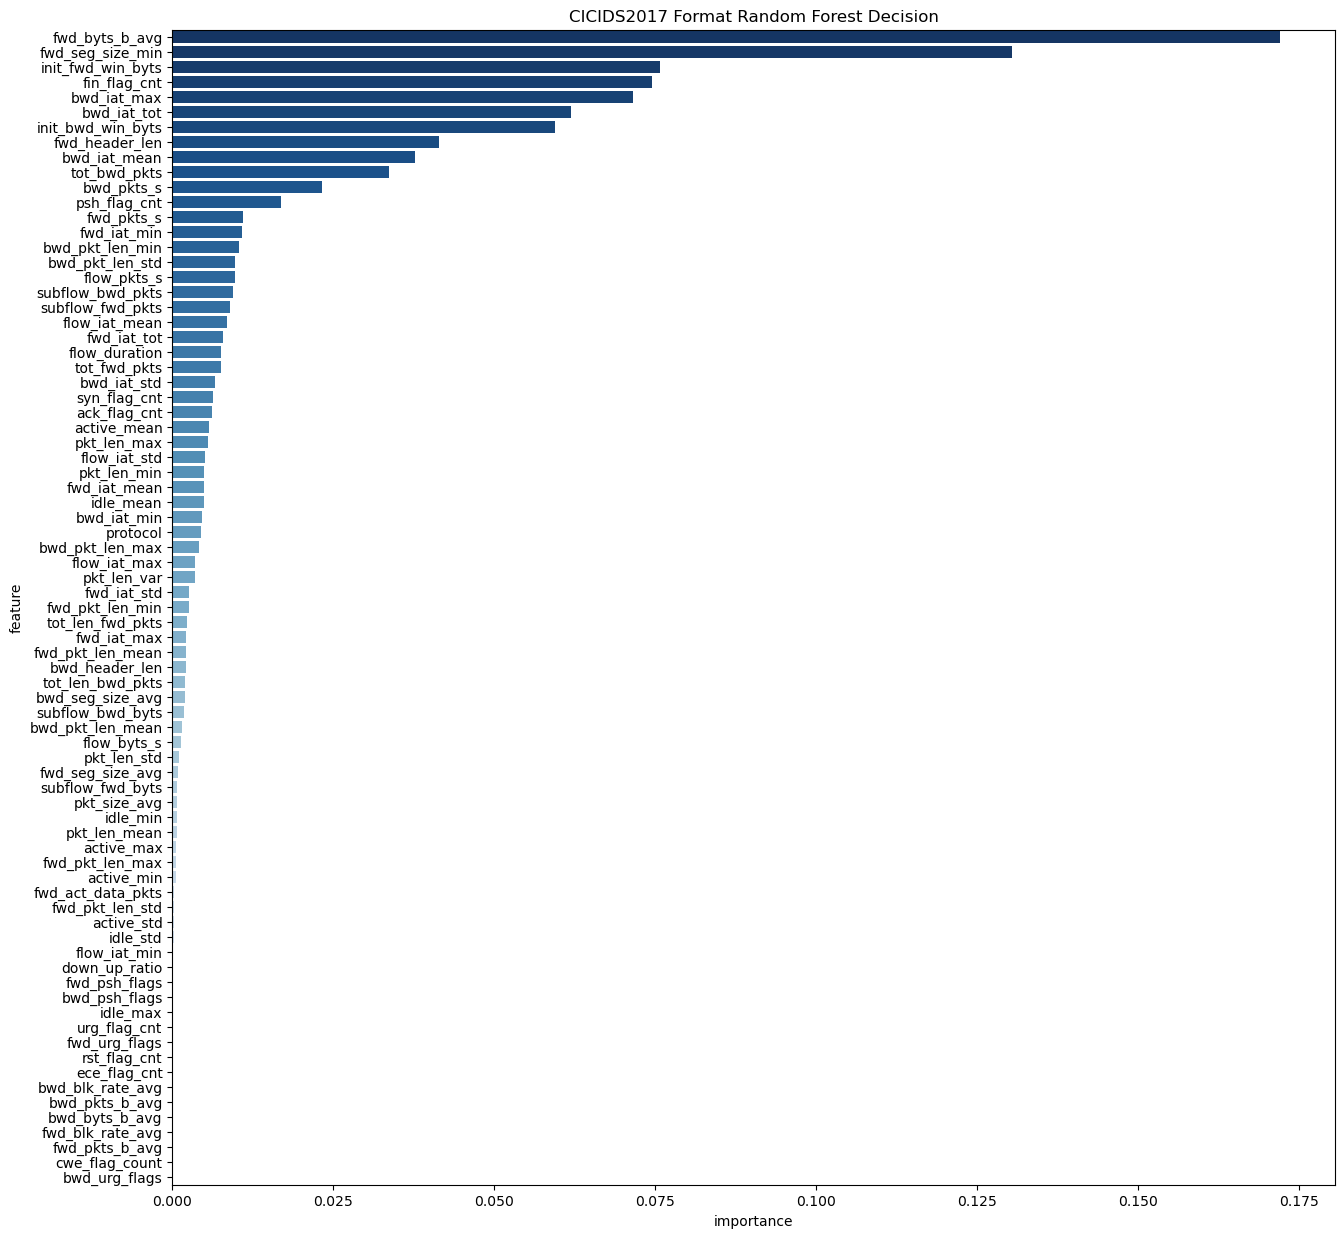

In [17]:
zipp  = []
for zipper in zip(cici_columns, cici_fi):
  zipp.append(zipper)
zipp = pd.DataFrame(zipp,columns=['feature','importance']).sort_values('importance',ascending=False)
plt.figure(figsize=(15, 15))
sns.barplot(y = zipp.feature, x= zipp.importance, palette='Blues_r')
plt.title("CICIDS2017 Format Random Forest Decision")

### UNSW-NB15 Format

In [34]:
unsw_fi = [0.012532078674940763, 0.006798306514026225, 0.009027156516621232, 0.05369252689381074, 0.046163676780041234, 0.014728717337781439, 0.022526806017835684, 0.018701336544349013, 0.0075742189785688654, 0.0028352437636211696, 0.011593214615101486, 0.002524733858349331, 0.0003002175260483837, 0.0011259045450670228, 0.0014121262600088657, 0.004453769965066304, 0.0051291723463437345, 0.00041939127126597265, 0.0005791727064731238, 0.00305047211153888, 0.002462295509540979, 0.013620557008195906, 0.007169690266959083, 0.001439099385530456, 0.00360869042249398, 0.01576186062812264, 3.15052534253199e-05, 0.005782229655473346, 0.0021331938724684697, 0.00014508985635040613, 7.050609279660104e-05, 0.0857687586843945, 0.06159761746771877, 0.09123868008616859, 0.1087264224126675, 0.0873153660498716, 0.12540682868232328, 0.12743497077649615, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.87725794383236e-05, 0.0, 0.0, 0.0, 0.0, 6.453373760675703e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4642922848400412e-06, 0.0, 0.0, 0.0, 0.0, 8.129096293293422e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.842253086681765e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.1189491769794128e-09, 2.8409186945720696e-06, 0.0, 0.0, 0.0, 0.0, 4.902366572623492e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.608060174913753e-07, 0.0, 0.0, 0.0, 0.0, 3.365577058931041e-07, 0.0, 0.0, 7.587119886085588e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2876020307271428e-09, 0.0, 0.0, 4.1156337189951285e-07, 0.0, 0.0, 0.0012560893628998982, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0014847734489959819, 5.0996263586636975e-11, 9.258200797587353e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.097428035463453e-09, 0.0, 5.334900702141977e-07, 0.0, 0.0, 0.0, 9.290482914113123e-07, 0.003618300405025924, 1.4411799303624976e-08, 0.0, 0.007361187742497682, 0.007501376537771342, 0.0, 0.0, 0.0, 0.0, 2.1902479542505465e-07, 0.0002576619828196581, 1.1670138923900685e-08, 0.006576730947583531, 0.0, 0.0, 0.0, 0.0, 0.0, 3.2809383040913485e-07, 0.0, 1.2016262048434508e-09, 6.907124650139303e-08, 0.003154846414279564, 0.0016518457453139595, 8.39554088527686e-07, 0.000929535400089077, 6.0400099729838745e-06, 0.0002805492794186106, 0.00027893982404023543, 2.363408104696163e-09, 9.09670390395217e-06, 5.785274286439381e-08, 1.5997642297599208e-06, 0.0, 5.9372787788135975e-05, 0.000547954625688978]

In [24]:
ConcatedUNSW = pd.read_csv('/home/irteam/wendyunji-dcloud-dir/wendyunji/Dataset/MLAC-dataset/encodedwithdlabel_ConcatedUNSW.csv')
print(list(ConcatedUNSW.columns))
print(len(ConcatedUNSW.columns))

['Unnamed: 0', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'proto_3pc', 'proto_a/n', 'proto_aes-sp3-d', 'proto_any', 'proto_argus', 'proto_aris', 'proto_arp', 'proto_ax.25', 'proto_bbn-rcc', 'proto_bna', 'proto_br-sat-mon', 'proto_cbt', 'proto_cftp', 'proto_chaos', 'proto_compaq-peer', 'proto_cphb', 'proto_cpnx', 'proto_crtp', 'proto_crudp', 'proto_dcn', 'proto_ddp', 'proto_ddx', 'proto_dgp', 'proto_egp', 'proto_eigrp', 'proto_emcon', 'proto_encap', 'proto_esp', 'proto_etherip', 'proto_fc', 'proto_fire', 'proto_ggp', 'proto_gmtp', 'proto_gre', 'proto_hmp', 'proto_i-nlsp', 'proto_iatp', '

In [29]:
unsw_columns = ['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'proto_3pc', 'proto_a/n', 'proto_aes-sp3-d', 'proto_any', 'proto_argus', 'proto_aris', 'proto_arp', 'proto_ax.25', 'proto_bbn-rcc', 'proto_bna', 'proto_br-sat-mon', 'proto_cbt', 'proto_cftp', 'proto_chaos', 'proto_compaq-peer', 'proto_cphb', 'proto_cpnx', 'proto_crtp', 'proto_crudp', 'proto_dcn', 'proto_ddp', 'proto_ddx', 'proto_dgp', 'proto_egp', 'proto_eigrp', 'proto_emcon', 'proto_encap', 'proto_esp', 'proto_etherip', 'proto_fc', 'proto_fire', 'proto_ggp', 'proto_gmtp', 'proto_gre', 'proto_hmp', 'proto_i-nlsp', 'proto_iatp', 'proto_ib', 'proto_icmp', 'proto_idpr', 'proto_idpr-cmtp', 'proto_idrp', 'proto_ifmp', 'proto_igmp', 'proto_igp', 'proto_il', 'proto_ip', 'proto_ipcomp', 'proto_ipcv', 'proto_ipip', 'proto_iplt', 'proto_ipnip', 'proto_ippc', 'proto_ipv6', 'proto_ipv6-frag', 'proto_ipv6-icmp', 'proto_ipv6-no', 'proto_ipv6-opts', 'proto_ipv6-route', 'proto_ipx-n-ip', 'proto_irtp', 'proto_isis', 'proto_iso-ip', 'proto_iso-tp4', 'proto_kryptolan', 'proto_l2tp', 'proto_larp', 'proto_leaf-1', 'proto_leaf-2', 'proto_llc', 'proto_lldp', 'proto_merit-inp', 'proto_mfe-nsp', 'proto_mhrp', 'proto_micp', 'proto_mobile', 'proto_mtp', 'proto_mux', 'proto_narp', 'proto_netblt', 'proto_nsfnet-igp', 'proto_nvp', 'proto_ospf', 'proto_pgm', 'proto_pim', 'proto_pipe', 'proto_pnni', 'proto_pri-enc', 'proto_prm', 'proto_ptp', 'proto_pup', 'proto_pvp', 'proto_qnx', 'proto_rdp', 'proto_rsvp', 'proto_rtcp', 'proto_rtp', 'proto_rvd', 'proto_sat-expak', 'proto_sat-mon', 'proto_sccopmce', 'proto_scps', 'proto_sctp', 'proto_sdrp', 'proto_secure-vmtp', 'proto_sep', 'proto_skip', 'proto_sm', 'proto_smp', 'proto_snp', 'proto_sprite-rpc', 'proto_sps', 'proto_srp', 'proto_st2', 'proto_stp', 'proto_sun-nd', 'proto_swipe', 'proto_tcf', 'proto_tcp', 'proto_tlsp', 'proto_tp++', 'proto_trunk-1', 'proto_trunk-2', 'proto_ttp', 'proto_udp', 'proto_udt', 'proto_unas', 'proto_uti', 'proto_vines', 'proto_visa', 'proto_vmtp', 'proto_vrrp', 'proto_wb-expak', 'proto_wb-mon', 'proto_wsn', 'proto_xnet', 'proto_xns-idp', 'proto_xtp', 'proto_zero', 'state_ACC', 'state_CLO', 'state_CON', 'state_ECO', 'state_ECR', 'state_FIN', 'state_INT', 'state_MAS', 'state_MHR', 'state_NNS', 'state_NRS', 'state_PAR', 'state_REQ', 'state_RSP', 'state_RST', 'state_TST', 'state_TXD', 'state_URF', 'state_URFIL', 'state_URH', 'state_URHPRO', 'state_URN', 'state_URP', 'state_no', 'service_-', 'service_0', 'service_dhcp', 'service_dns', 'service_ftp', 'service_ftp-data', 'service_http', 'service_irc', 'service_pop3', 'service_radius', 'service_smtp', 'service_snmp', 'service_ssh', 'service_ssl']

In [35]:
print(len(unsw_fi), len(unsw_columns))

215 215


82


Text(0.5, 1.0, 'UNSW-NB15 Format Random Forest Decision')

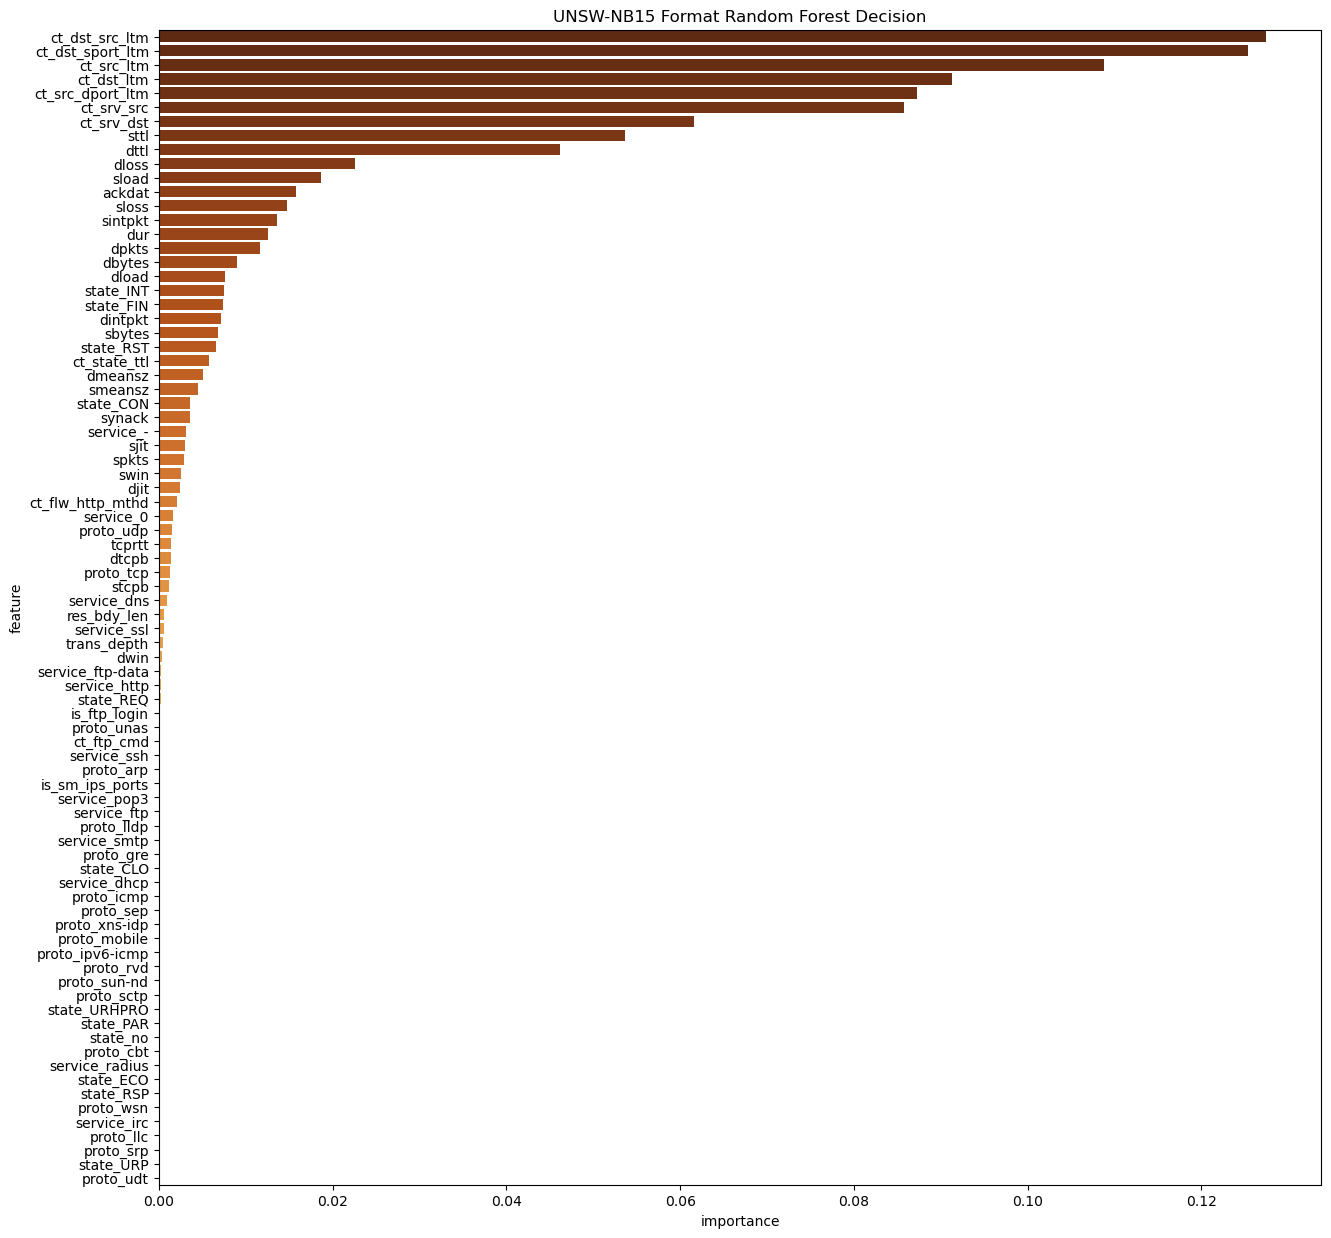

In [42]:
zipp  = []
for zipper in zip(unsw_columns, unsw_fi):
  zipp.append(zipper)
zipp = pd.DataFrame(zipp,columns=['feature','importance']).sort_values('importance',ascending=False)

# 0 값 삭제
val0idx = zipp[zipp['importance'] == 0].index
zipp.drop(val0idx, inplace=True)
print(len(zipp))

plt.figure(figsize=(15, 15))
sns.barplot(y = zipp.feature, x= zipp.importance, palette='YlOrBr_r')
plt.title("UNSW-NB15 Format Random Forest Decision")